In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# make_blobs?

In [3]:
X, Y = make_blobs(
    n_samples = 1000,
    n_features = 2,
    centers = 7,
    cluster_std = 1.0,
    center_box = (-10.0, 10.0),
    shuffle = True,
    random_state = 100,
    return_centers=False,
)

In [4]:
print(X.shape)

(1000, 2)


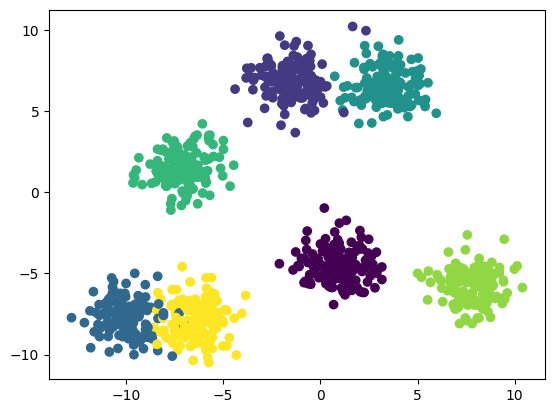

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

In [6]:
k = 5

color = ['red', 'yellow', 'blue', 'green', 'purple']

clusters = {}

for i in range(k):
    center = np.random.randint(-12, 12, 2)
    points = []
    
    cluster = {
        'center': center,
        'point':points,
        'color': color[i]
    }
    
    clusters[i] = cluster

In [7]:
# np.random.randint?

In [8]:
clusters

{0: {'center': array([0, 9]), 'point': [], 'color': 'red'},
 1: {'center': array([ 8, -6]), 'point': [], 'color': 'yellow'},
 2: {'center': array([ 7, -1]), 'point': [], 'color': 'blue'},
 3: {'center': array([-5,  8]), 'point': [], 'color': 'green'},
 4: {'center': array([ 3, -2]), 'point': [], 'color': 'purple'}}

In [9]:
def distance(k1, p):
    return np.sqrt(np.sum((k1 - p)**2))

In [10]:
# Step - 2
def assignment_clusters(clusters):
    for i in range(X.shape[0]):
        dist = []
        
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['point'].append(X[i])

In [11]:
# Step - 3
def updation_clusters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['point'])
        
        if pts.shape[0] > 0:
            u = np.mean(pts, axis = 0)
            clusters[i]['center'] = u
            clusters[i]['point'] = []

In [12]:
# x = np.random.randint(0, 20, (4, 2))
# print(x.shape)
# print(np.mean(x, axis = 0), np.mean(x, axis = 0).shape)

In [13]:
def plot_clusters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['point'])
#         print(pts.shape)
        
        try:
            plt.scatter(pts[:, 0], pts[:, 1], color = clusters[i]['color'])
        except:
            pass
        
        centroid = clusters[i]['center']
        plt.scatter(centroid[0], centroid[1], color = 'black', marker = '^')

In [14]:
clusters

{0: {'center': array([0, 9]), 'point': [], 'color': 'red'},
 1: {'center': array([ 8, -6]), 'point': [], 'color': 'yellow'},
 2: {'center': array([ 7, -1]), 'point': [], 'color': 'blue'},
 3: {'center': array([-5,  8]), 'point': [], 'color': 'green'},
 4: {'center': array([ 3, -2]), 'point': [], 'color': 'purple'}}

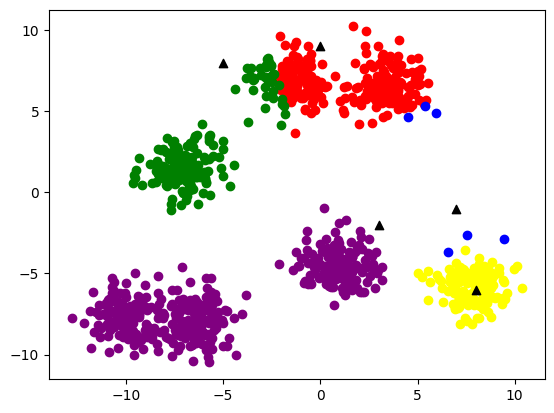

In [15]:
assignment_clusters(clusters)
plot_clusters(clusters)

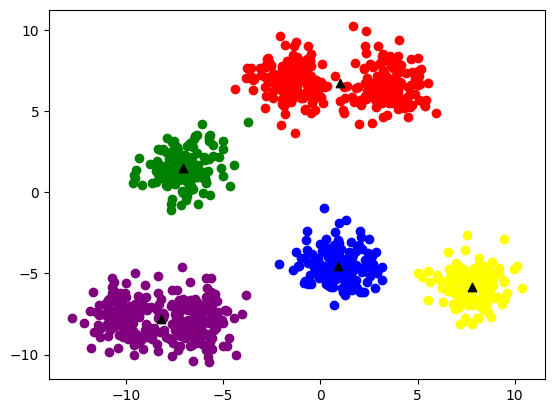

In [23]:
# Step - 4
assignment_clusters(clusters)
plot_clusters(clusters)
updation_clusters(clusters)